IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

HUANG Stéphanie

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2023


<font size="+1" color="RED"><b>Date de rendu : lundi 22 mai 2023, avant 18h</b></font>
    
<b>Attention! le site Moodle ferme à 18h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les fichiers de données ne doivent pas être inclus dans votre archive ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et QUE les fichiers demandés.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mercredi 24 mai 2023**</font>, à partir de 14h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille.

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- data/
                  -- AGRIBALYSE3-ingredients.csv
                  -- AGRIBALYSE3-etapes.csv
                  -- AGRIBALYSE3-synthese.csv


Dans le notebook que vous rendrez, le chargement des fichiers de données considèrera donc cette arborescence.


# Les données Agribalyse (version 3.1)

Les données sont issues des données publiques du site de l'ADEME: https://agribalyse.ademe.fr/
Il est conseillé de parcourir la documentation de ces données sur le site ci-dessus pour se familiariser avec les différentes informations qu'elles fournissent.

Pour ce projet, vous travaillerez sur les données sur les produits alimentaires dont la version originale est visible ici : https://doc.agribalyse.fr/documentation/acces-donnees

Si vous n'arrivez pas à télécharger ou à ouvrir ce fichier, des versions de ce fichier au format libreoffice et au format Excel 97 sont fournies dans l'archive `data_tableur`. Il est conseillé de regarder un de ces fichiers car vous y trouverez des informations complémentaires sur les noms des colonnes des 3 fichiers CSV de `data` décrits ci-dessous.

Pour vous aider à manipuler les données nous vous fournissons dans l'archive `data` : les 3 tables du fichiers sont fournies sous la forme de 3 fichiers CSV directement lisibles par la commande `read_csv` de Pandas (le séparateur de colonnes est le `';'`). Ce sont ces 3 fichiers à utiliser dans votre notebook. Un exemple de chargement est donné plus loin dans ce notebook. Les fichiers sont:
- AGRIBALYSE3-ingredients.csv
- AGRIBALYSE3-etapes.csv
- AGRIBALYSE3-synthese.csv

**Remarque**: les données Agribalyse de 2021 ont fait l'objet du projet de l'an dernier, cette année c'est une nouvelle version étendue de ces données qui sont utilisées pour ce projet, nous attendons donc des analyses qui tirent partie des nouveautés de cette nouvelle version.

## Exemples

In [363]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [364]:
data_synthese = pd.read_csv("data/AGRIBALYSE3-synthese.csv", sep=';') 
data_synthese.columns
print("Nombre de lignes: ",len(data_synthese))
print("Nombre de colonnes: ",len(data_synthese.columns))

Nombre de lignes:  2517
Nombre de colonnes:  29


In [365]:
for i in range(0,len(data_synthese.columns)):
    if i>10:
        print("col ",i,": ",data_synthese.columns[i], "\tmoyenne = ",data_synthese[data_synthese.columns[i]].mean())
    else:
        print("col ",i,": ",data_synthese.columns[i])

col  0 :  Code AGB
col  1 :  Code CIQUAL
col  2 :  Groupe d'aliment
col  3 :  Sous-groupe d'aliment
col  4 :  Nom du Produit en Français
col  5 :  LCI Name
col  6 :  code saison
col  7 :  code avion
col  8 :  Livraison
col  9 :  Matériau d'emballage
col  10 :  Préparation
col  11 :  DQR 	moyenne =  2.7681644815256257
col  12 :  Score unique EF 3.1 	moyenne =  0.6889596344854987
col  13 :  Changement climatique 	moyenne =  5.420519666269368
col  14 :  Appauvrissement de la couche d'ozone 	moyenne =  5.383361620977354e-07
col  15 :  Rayonnements ionisants 	moyenne =  1.016821692491061
col  16 :  Formation photochimique d'ozone 	moyenne =  0.021625918156535556
col  17 :  Particules fines 	moyenne =  5.735583075089393e-07
col  18 :  Effets toxicologiques sur la santé humaine : substances non-cancérogènes 	moyenne =  1.0743762415574097e-07
col  19 :  Effets toxicologiques sur la santé humaine : substances cancérogènes 	moyenne =  3.8854543504171635e-09
col  20 :  Acidification terrestre et 

In [366]:
data_etapes = pd.read_csv("data/AGRIBALYSE3-etapes.csv", sep=';') 
data_etapes.columns
print("Nombre de lignes: ",len(data_etapes))
print("Nombre de colonnes: ",len(data_etapes.columns))

Nombre de lignes:  2517
Nombre de colonnes:  132


In [367]:
for i in range(0,len(data_etapes.columns)):
    print("col ",i,": ",data_etapes.columns[i])

col  0 :  Code AGB
col  1 :  Code CIQUAL
col  2 :  Groupe d aliment
col  3 :  Sous-groupe d aliment
col  4 :  Nom du Produit en Français
col  5 :  LCI Name
col  6 :  DQR
col  7 :  Nom et code
col  8 :  Agriculture
col  9 :  Transformation
col  10 :  Emballage
col  11 :  Transport
col  12 :  Supermarché et distribution
col  13 :  Consommation
col  14 :  Total
col  15 :  Agriculture.1
col  16 :  Transformation.1
col  17 :  Emballage.1
col  18 :  Transport.1
col  19 :  Supermarché et distribution.1
col  20 :  Consommation.1
col  21 :  Total.1
col  22 :  Agriculture.2
col  23 :  Transformation.2
col  24 :  Emballage.2
col  25 :  Transport.2
col  26 :  Supermarché et distribution.2
col  27 :  Consommation.2
col  28 :  Total.2
col  29 :  Agriculture.3
col  30 :  Transformation.3
col  31 :  Emballage.3
col  32 :  Transport.3
col  33 :  Supermarché et distribution.3
col  34 :  Consommation.3
col  35 :  Total.3
col  36 :  Agriculture.4
col  37 :  Transformation.4
col  38 :  Emballage.4
col  39 

In [368]:
print("Quelques infos :")
for i in range(0,17):
    print("----")
    for col in ['Agriculture', 'Transformation', 'Emballage', 'Transport', 'Supermarché et distribution', \
                'Consommation', 'Total']:
        if i>0:
            nom_col = col + "." +str(i)
        else:
            nom_col = col
        print(nom_col,"\tmoyenne = ",data_etapes[nom_col].mean())

Quelques infos :
----
Agriculture 	moyenne =  0.5684966870458402
Transformation 	moyenne =  0.056136918226633296
Emballage 	moyenne =  0.02242675546471593
Transport 	moyenne =  0.026165883152808902
Supermarché et distribution 	moyenne =  0.007877125406877234
Consommation 	moyenne =  0.007633790367775129
Total 	moyenne =  0.6887371596646508
----
Agriculture.1 	moyenne =  4.2834051017208985
Transformation.1 	moyenne =  0.49566790046860953
Emballage.1 	moyenne =  0.2551146021668653
Transport.1 	moyenne =  0.31395988182510925
Supermarché et distribution.1 	moyenne =  0.03147132845606277
Consommation.1 	moyenne =  0.042848097985971396
Total.1 	moyenne =  5.422466912623516
----
Agriculture.2 	moyenne =  3.3849700977868895e-07
Transformation.2 	moyenne =  3.346837165345689e-08
Emballage.2 	moyenne =  8.733627654263806e-08
Transport.2 	moyenne =  7.395954808027414e-08
Supermarché et distribution.2 	moyenne =  2.4693114096368693e-09
Consommation.2 	moyenne =  2.6369538328196267e-09
Total.2 	moy

In [369]:
data_ingredients = pd.read_csv("data/AGRIBALYSE3-ingredients.csv",sep=";")
data_ingredients.columns
print("Nombre de lignes: ",len(data_ingredients))
print("Nombre de colonnes: ",len(data_ingredients.columns))

Nombre de lignes:  6856
Nombre de colonnes:  27


In [370]:
for i in range(0,len(data_ingredients.columns)):
    if i<10:
        print(i,": ", data_ingredients.columns[i])
    else:
        print(i,": ", data_ingredients.columns[i], \
              "\tmoyennne = ", data_ingredients[data_ingredients.columns[i]].mean())

0 :  Ciqual AGB
1 :  Ciqual code
2 :  Groupe d'aliment
3 :  Sous-groupe d'aliment
4 :  Nom Français
5 :  LCI Name
6 :  Ingredients
7 :  Code et Nom
8 :  Groupe
9 :  Sous-groupe
10 :  Formation photochimique d'ozone 	moyennne =  0.14901077587806652
11 :  Particules fines 	moyennne =  1.1694919040652128
12 :  Effets toxicologiques sur la santé humaine : substances non-cancérogènes 	moyennne =  9.663670448533454e-08
13 :  Effets toxicologiques sur la santé humaine : substances cancérogènes 	moyennne =  0.32177220746506685
14 :  Acidification terrestre et eaux douces 	moyennne =  0.0038680513541169783
15 :  Eutrophisation eaux douces 	moyennne =  1.1525166083035649e-07
16 :  Eutrophisation marine 	moyennne =  2.5530761424091264e-08
17 :  Eutrophisation terrestre 	moyennne =  9.025745752722688e-10
18 :  Écotoxicité pour écosystèmes aquatiques d'eau douce 	moyennne =  0.01583401820414365
19 :  Utilisation du sol 	moyennne =  0.00017051056352429376
20 :  Épuisement des ressources eau 	moyennn

# Problèmatiques:

Les problématiques auxquelles je vais tenter de mettre en évidence avec les differents algorithmes vu en cours sont les suivantes:

- supervisé: Prédire le groupe d'aliment auquel appartient un aliment selon ses caractéristiques

- non supervisé: Regrouper les aliments par impact environnemental selon le score EF 3.1

### APPRENTISSAGE SUPERVISE

#### Pré-traitement des données

In [371]:
data_synthese.columns

Index(['Code AGB', 'Code CIQUAL', 'Groupe d'aliment', 'Sous-groupe d'aliment',
       'Nom du Produit en Français', 'LCI Name', 'code saison', 'code avion',
       'Livraison', 'Matériau d'emballage', 'Préparation', 'DQR',
       'Score unique EF 3.1', 'Changement climatique',
       'Appauvrissement de la couche d'ozone', 'Rayonnements ionisants',
       'Formation photochimique d'ozone', 'Particules fines',
       'Effets toxicologiques sur la santé humaine : substances non-cancérogènes',
       'Effets toxicologiques sur la santé humaine : substances cancérogènes',
       'Acidification terrestre et eaux douces', 'Eutrophisation eaux douces',
       'Eutrophisation marine', 'Eutrophisation terrestre',
       'Écotoxicité pour écosystèmes aquatiques d'eau douce',
       'Utilisation du sol', 'Épuisement des ressources eau',
       'Épuisement des ressources énergétiques',
       'Épuisement des ressources minéraux'],
      dtype='object')

In [372]:
Groupe_aliment = data_synthese['Groupe d\'aliment']

valeurs, nb_fois = np.unique(Groupe_aliment,return_counts=True)

print("Valeurs différentes dans l'array           : ",valeurs)
print("Décompte de chaque valeur (respectivement) : ",nb_fois)

Valeurs différentes dans l'array           :  ['aides culinaires et ingrédients divers' 'aliments infantiles' 'boissons'
 'entrées et plats composés' 'fruits, légumes, légumineuses et oléagineux'
 'glaces et sorbets' 'lait et produits laitiers' 'matières grasses'
 'produits céréaliers' 'produits sucrés' 'viandes, œufs, poissons']
Décompte de chaque valeur (respectivement) :  [160  33 228 292 426  25 223  56 376  53 645]


In [373]:
data1 = data_synthese.iloc[:,12:]
data1_noms = data1.columns
data1 = pd.concat([Groupe_aliment,data1], axis=1)
data1

,Groupe d'aliment,Score unique EF 3.1,Changement climatique,Appauvrissement de la couche d'ozone,Rayonnements ionisants,Formation photochimique d'ozone,Particules fines,Effets toxicologiques sur la santé humaine : substances non-cancérogènes,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
0,aides culinaires et ingrédients divers,1.2300,6.770,1.020000e-06,11.100,0.03890,7.170000e-07,7.440000e-08,6.480000e-09,0.09970,0.001870,0.01330,0.12700,44.60,26.5,3.100,315.00,0.000088
1,aides culinaires et ingrédients divers,0.1030,0.749,1.230000e-07,0.171,0.00293,8.250000e-08,1.170000e-08,4.660000e-10,0.00622,0.000124,0.00232,0.01270,5.83,20.2,2.520,12.70,0.000007
2,aides culinaires et ingrédients divers,0.0638,0.356,5.450000e-08,0.143,0.00107,2.330000e-08,7.450000e-09,2.980000e-10,0.00200,0.000068,0.00212,0.00628,4.09,18.5,3.020,6.23,0.000004
3,aides culinaires et ingrédients divers,0.1320,0.815,6.270000e-08,0.141,0.00256,6.900000e-08,1.200000e-08,6.190000e-10,0.00811,0.000203,0.00405,0.03120,5.68,36.4,5.290,12.60,0.000005
4,aides culinaires et ingrédients divers,1.2300,6.770,1.020000e-06,11.100,0.03890,7.170000e-07,7.440000e-08,6.480000e-09,0.09970,0.001870,0.01330,0.12700,44.60,26.5,3.100,315.00,0.000088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,"viandes, œufs, poissons",2.1800,22.400,7.120000e-07,1.870,0.04180,1.520000e-06,4.350000e-07,1.080000e-08,0.22500,0.002210,0.15600,0.96000,193.00,1520.0,6.280,111.00,0.000038
2513,"viandes, œufs, poissons",2.2600,23.600,7.740000e-07,1.680,0.04380,1.570000e-06,4.500000e-07,1.120000e-08,0.23200,0.002300,0.16000,0.99000,200.00,1570.0,6.520,116.00,0.000041
2514,"viandes, œufs, poissons",0.8160,4.250,7.760000e-07,0.425,0.06480,7.260000e-07,9.080000e-08,4.020000e-09,0.09540,0.000677,0.02250,0.24400,24.10,14.7,0.559,60.60,0.000163
2515,"viandes, œufs, poissons",1.0300,5.160,9.570000e-07,1.120,0.07900,8.870000e-07,1.140000e-07,5.000000e-09,0.11700,0.000867,0.02750,0.29900,29.30,18.7,0.643,86.30,0.000203


Afin de pouvoir utiliser les differents classifieurs, il faut les adapter afin qu'ils puissent traiter les données catégorielles.
On va utiliser l'encodage one-hot qui s'implémente en python avec la fonction `get_dummies` de la librairie `pandas`.

In [374]:
data1_ = pd.get_dummies(data1)
data1_ = data1_.replace({True: 1, False: -1})
data1_

,Score unique EF 3.1,Changement climatique,Appauvrissement de la couche d'ozone,Rayonnements ionisants,Formation photochimique d'ozone,Particules fines,Effets toxicologiques sur la santé humaine : substances non-cancérogènes,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,...,Groupe d'aliment_aliments infantiles,Groupe d'aliment_boissons,Groupe d'aliment_entrées et plats composés,"Groupe d'aliment_fruits, légumes, légumineuses et oléagineux",Groupe d'aliment_glaces et sorbets,Groupe d'aliment_lait et produits laitiers,Groupe d'aliment_matières grasses,Groupe d'aliment_produits céréaliers,Groupe d'aliment_produits sucrés,"Groupe d'aliment_viandes, œufs, poissons"
0,1.2300,6.770,1.020000e-06,11.100,0.03890,7.170000e-07,7.440000e-08,6.480000e-09,0.09970,0.001870,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,0.1030,0.749,1.230000e-07,0.171,0.00293,8.250000e-08,1.170000e-08,4.660000e-10,0.00622,0.000124,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,0.0638,0.356,5.450000e-08,0.143,0.00107,2.330000e-08,7.450000e-09,2.980000e-10,0.00200,0.000068,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,0.1320,0.815,6.270000e-08,0.141,0.00256,6.900000e-08,1.200000e-08,6.190000e-10,0.00811,0.000203,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1.2300,6.770,1.020000e-06,11.100,0.03890,7.170000e-07,7.440000e-08,6.480000e-09,0.09970,0.001870,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2.1800,22.400,7.120000e-07,1.870,0.04180,1.520000e-06,4.350000e-07,1.080000e-08,0.22500,0.002210,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2513,2.2600,23.600,7.740000e-07,1.680,0.04380,1.570000e-06,4.500000e-07,1.120000e-08,0.23200,0.002300,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2514,0.8160,4.250,7.760000e-07,0.425,0.06480,7.260000e-07,9.080000e-08,4.020000e-09,0.09540,0.000677,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
2515,1.0300,5.160,9.570000e-07,1.120,0.07900,8.870000e-07,1.140000e-07,5.000000e-09,0.11700,0.000867,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1


On constate qu'il y a 11 catégories: 

'aides culinaires et ingrédients divers' 
'aliments infantiles' 
'boissons'
'entrées et plats composés' 
'fruits, légumes, légumineuses et oléagineux'
'glaces et sorbets' 
'lait et produits laitiers' 
'matières grasses'
'produits céréaliers' 
'produits sucrés' 
'viandes, œufs, poissons'

Nous allons entrainer 11 classifieurs, un par catégorie, et tester sur les données mise de coté. Celui dont le taux de classification est le plus haut correspondra à la classe prédite pour l'exemple donné.

In [375]:
# labels de tous les groupes d'aliment
data1_label = np.array(data1_.iloc[:, -11:])
data1_label

array([[ 1, -1, -1, ..., -1, -1, -1],
       [ 1, -1, -1, ..., -1, -1, -1],
       [ 1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1,  1],
       [-1, -1, -1, ..., -1, -1,  1],
       [-1, -1, -1, ..., -1, -1,  1]], dtype=int64)

In [376]:
# dataset
data1_num = np.array(data1_.iloc[:, :-11])
data1_num

array([[1.23e+00, 6.77e+00, 1.02e-06, ..., 3.10e+00, 3.15e+02, 8.76e-05],
       [1.03e-01, 7.49e-01, 1.23e-07, ..., 2.52e+00, 1.27e+01, 6.60e-06],
       [6.38e-02, 3.56e-01, 5.45e-08, ..., 3.02e+00, 6.23e+00, 3.72e-06],
       ...,
       [8.16e-01, 4.25e+00, 7.76e-07, ..., 5.59e-01, 6.06e+01, 1.63e-04],
       [1.03e+00, 5.16e+00, 9.57e-07, ..., 6.43e-01, 8.63e+01, 2.03e-04],
       [8.61e-01, 6.04e+00, 7.35e-07, ..., 4.03e+00, 9.64e+01, 2.54e-05]])

In [377]:
np.random.seed(42)

(train_desc, train_label), (test_desc, test_label) = ut.genere_train_test(data1_num,data1_label,800,750)

print("Base d'apprentissage: ",train_desc.shape, " et ", len(train_label)," labels")
print("Base de test: ",test_desc.shape, " et ", len(test_label)," labels")

Base d'apprentissage:  (1550, 17)  et  1550  labels
Base de test:  (1275, 17)  et  1275  labels


#### KNN

Pour déterminer le k optimal qui maximise les performances de notre classifieur, nous allons calculer la performance du classifieur sur différents valeurs de k et choisir celui qui a une meilleure performance. On utilisera la méthode de la validation croisée en 10 pour évaluer la performance.

-------------------------------------------------------------------------------------------------------------------------------------------------

In [378]:
# TEST AVEC VALIDATION CROISEE EN 10 
# Groupe Aides culinaires et ingrédients divers

np.random.seed(42) 

valeurs_k = np.arange(2, 20)

niter = 10
acc = []
for k in valeurs_k:
    KNN1 = cl.ClassifierKNN(train_desc.shape[1],k)
    (perf, perf_moy, ecart) = ev.validation_croisee(KNN1,(train_desc,train_label[:,0]), niter)
    acc.append(perf_moy)

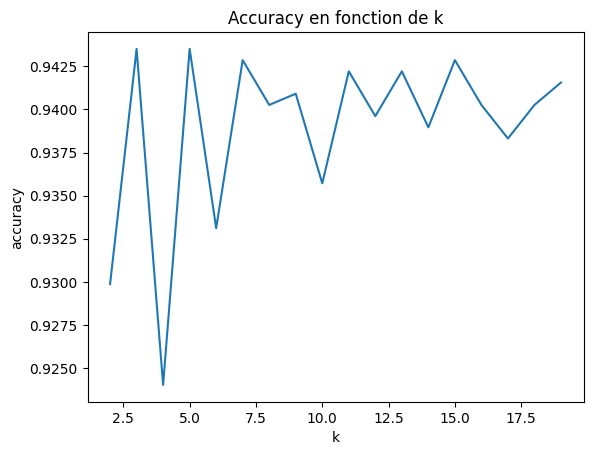

In [379]:
plt.title('Accuracy en fonction de k')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(valeurs_k, acc)
plt.show()

In [380]:
# Affichage du k optimal
best_k = valeurs_k[np.argmax(acc)]
k1 = acc[np.argmax(acc)]
print("k optimal: ", best_k)
print("Performance optimale: ", k1)

k optimal:  3
Performance optimale:  0.9435064935064934


In [381]:
knn1 = cl.ClassifierKNN(train_desc.shape[1], best_k)
knn1.train(train_desc, train_label[:,0])
a1 = knn1.accuracy(test_desc, test_label[:,0])

# Affichage du taux de bonne classification du dataset_train  
print("Taux de bonne classification sur le dataset_train: ", a1)

Taux de bonne classification sur le dataset_train:  0.9419607843137255


-------------------------------------------------------------------------------------------------------------------------------------------------

In [382]:
# TEST AVEC VALIDATION CROISEE EN 10 
# Groupe d'aliments infantiles

np.random.seed(42) 

valeurs_k = np.arange(2, 20)

niter = 10
acc = []
for k in valeurs_k:
    KNN2 = cl.ClassifierKNN(train_desc.shape[1],k)
    (perf, perf_moy, ecart) = ev.validation_croisee(KNN2,(train_desc,train_label[:,1]), niter)
    acc.append(perf_moy)

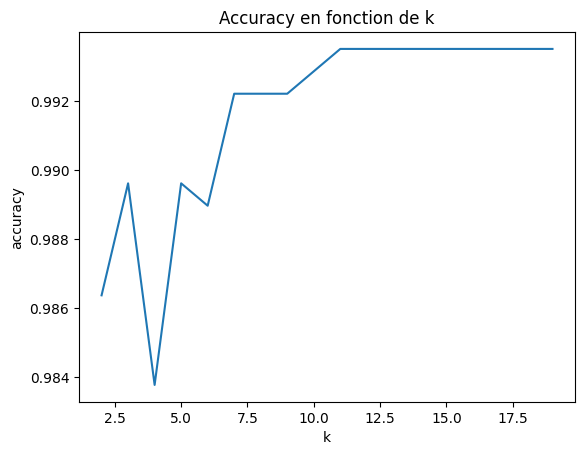

In [383]:
plt.title('Accuracy en fonction de k')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(valeurs_k, acc)
plt.show()

In [384]:
# Affichage du k optimal
best_k = valeurs_k[np.argmax(acc)]
k2 = acc[np.argmax(acc)]
print("k optimal: ", best_k)
print("Performance optimale: ", k2)

k optimal:  11
Performance optimale:  0.9935064935064937


In [385]:
knn2 = cl.ClassifierKNN(train_desc.shape[1], best_k)
knn2.train(train_desc, train_label[:,1])
a2 = knn2.accuracy(test_desc, test_label[:,1])

# Affichage du taux de bonne classification du dataset_train  
print("Taux de bonne classification sur le dataset_train: ", a2)

Taux de bonne classification sur le dataset_train:  0.9866666666666667


-------------------------------------------------------------------------------------------------------------------------------------------------

In [386]:
# TEST AVEC VALIDATION CROISEE EN 10 
# Groupe boissons

np.random.seed(42) 

valeurs_k = np.arange(2, 20)

niter = 10
acc = []
for k in valeurs_k:
    KNN3 = cl.ClassifierKNN(train_desc.shape[1],k)
    (perf, perf_moy, ecart) = ev.validation_croisee(KNN3,(train_desc,train_label[:,2]), niter)
    acc.append(perf_moy)

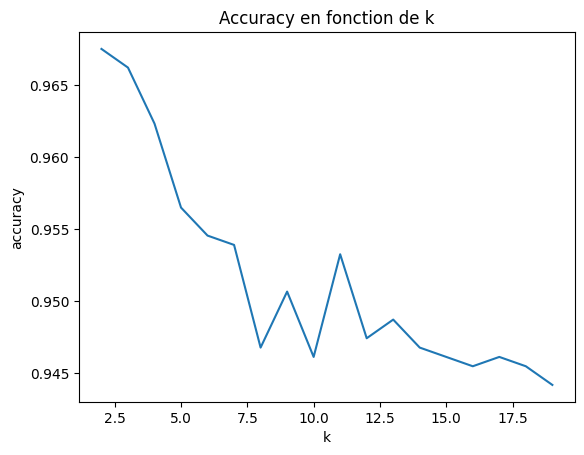

In [387]:
plt.title('Accuracy en fonction de k')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(valeurs_k, acc)
plt.show()

In [388]:
# Affichage du k optimal
best_k = valeurs_k[np.argmax(acc)]
k3 = acc[np.argmax(acc)]
print("k optimal: ", best_k)
print("Performance optimale: ", k3)

k optimal:  2
Performance optimale:  0.9675324675324675


In [389]:
knn3 = cl.ClassifierKNN(train_desc.shape[1], best_k)
knn3.train(train_desc, train_label[:,2])
a3 = knn3.accuracy(test_desc, test_label[:,2])

# Affichage du taux de bonne classification du dataset_train  
print("Taux de bonne classification sur le dataset_train: ", a3)

Taux de bonne classification sur le dataset_train:  0.9568627450980393


-------------------------------------------------------------------------------------------------------------------------------------------------

In [390]:
# TEST AVEC VALIDATION CROISEE EN 10 
# Groupe entrées et plats composés

np.random.seed(42) 

valeurs_k = np.arange(2, 20)

niter = 10
acc = []
for k in valeurs_k:
    KNN4 = cl.ClassifierKNN(train_desc.shape[1],k)
    (perf, perf_moy, ecart) = ev.validation_croisee(KNN4,(train_desc,train_label[:,3]), niter)
    acc.append(perf_moy)

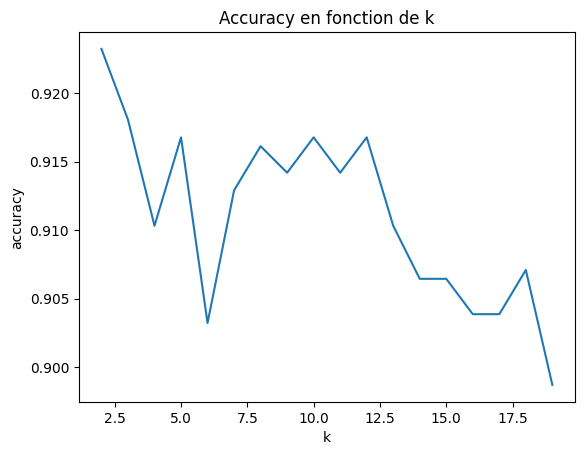

In [391]:
plt.title('Accuracy en fonction de k')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(valeurs_k, acc)
plt.show()

In [392]:
# Affichage du k optimal
best_k = valeurs_k[np.argmax(acc)]
k4 = acc[np.argmax(acc)]
print("k optimal: ", best_k)
print("Performance optimale: ", k4)

k optimal:  2
Performance optimale:  0.9232258064516128


In [393]:
knn4 = cl.ClassifierKNN(train_desc.shape[1], best_k)
knn4.train(train_desc, train_label[:,3])
a4 = knn4.accuracy(test_desc, test_label[:,3])

# Affichage du taux de bonne classification du dataset_train  
print("Taux de bonne classification sur le dataset_train: ", a4)

Taux de bonne classification sur le dataset_train:  0.9027450980392157


-------------------------------------------------------------------------------------------------------------------------------------------------

In [394]:
# TEST AVEC VALIDATION CROISEE EN 10 
# Groupe fruits, légumes, légumineuses et oléagineux

np.random.seed(42) 

valeurs_k = np.arange(2, 20)

niter = 10
acc = []
for k in valeurs_k:
    KNN5 = cl.ClassifierKNN(train_desc.shape[1],k)
    (perf, perf_moy, ecart) = ev.validation_croisee(KNN5,(train_desc,train_label[:,4]), niter)
    acc.append(perf_moy)

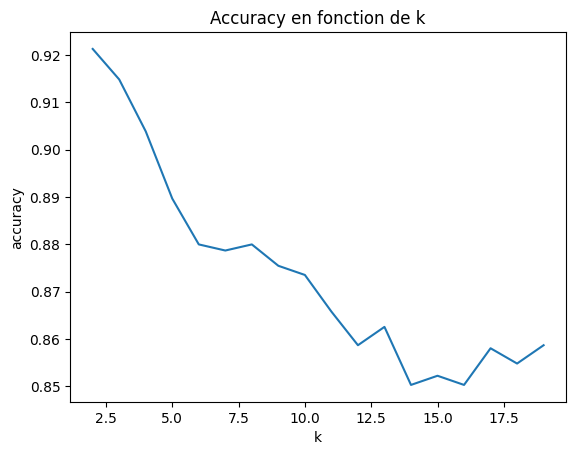

In [395]:
plt.title('Accuracy en fonction de k')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(valeurs_k, acc)
plt.show()

In [396]:
# Affichage du k optimal
best_k = valeurs_k[np.argmax(acc)]
k5 = acc[np.argmax(acc)]
print("k optimal: ", best_k)
print("Performance optimale: ", k5)

k optimal:  2
Performance optimale:  0.9212903225806451


In [397]:
knn5 = cl.ClassifierKNN(train_desc.shape[1], best_k)
knn5.train(train_desc, train_label[:,4])
a5 = knn5.accuracy(test_desc, test_label[:,4])

# Affichage du taux de bonne classification du dataset_train  
print("Taux de bonne classification sur le dataset_train: ", a5)

Taux de bonne classification sur le dataset_train:  0.8878431372549019


-------------------------------------------------------------------------------------------------------------------------------------------------

In [398]:
# TEST AVEC VALIDATION CROISEE EN 10 
# Groupe glaces et sorbets

np.random.seed(42) 

valeurs_k = np.arange(2, 20)

niter = 10
acc = []
for k in valeurs_k:
    KNN6 = cl.ClassifierKNN(train_desc.shape[1],k)
    (perf, perf_moy, ecart) = ev.validation_croisee(KNN6,(train_desc,train_label[:,5]), niter)
    acc.append(perf_moy)

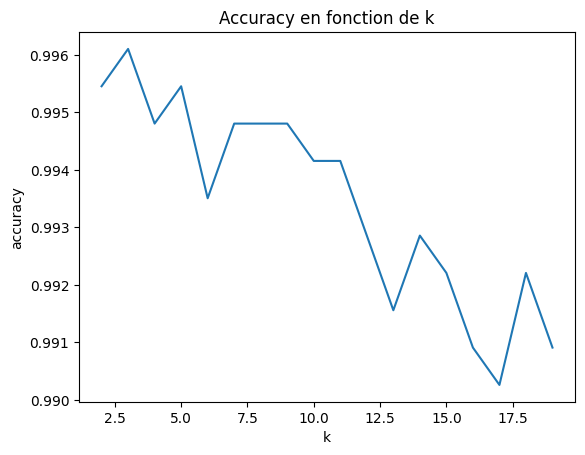

In [399]:
plt.title('Accuracy en fonction de k')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(valeurs_k, acc)
plt.show()

In [400]:
# Affichage du k optimal
best_k = valeurs_k[np.argmax(acc)]
k6 = acc[np.argmax(acc)]
print("k optimal: ", best_k)
print("Performance optimale: ", k6)

k optimal:  3
Performance optimale:  0.996103896103896


In [401]:
knn6 = cl.ClassifierKNN(train_desc.shape[1], best_k)
knn6.train(train_desc, train_label[:,5])
a6 = knn6.accuracy(test_desc, test_label[:,5])

# Affichage du taux de bonne classification du dataset_train  
print("Taux de bonne classification sur le dataset_train: ", a6)

Taux de bonne classification sur le dataset_train:  0.996078431372549


-------------------------------------------------------------------------------------------------------------------------------------------------

In [402]:
# TEST AVEC VALIDATION CROISEE EN 10 
# Groupe lait et produits laitiers

np.random.seed(42) 

valeurs_k = np.arange(2, 20)

niter = 10
acc = []
for k in valeurs_k:
    KNN7 = cl.ClassifierKNN(train_desc.shape[1],k)
    (perf, perf_moy, ecart) = ev.validation_croisee(KNN7,(train_desc,train_label[:,6]), niter)
    acc.append(perf_moy)

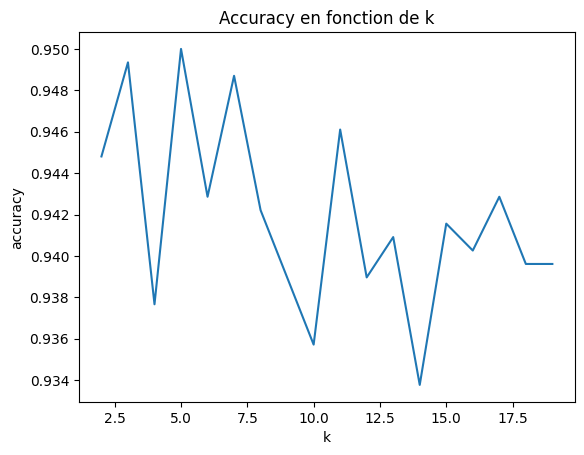

In [403]:
plt.title('Accuracy en fonction de k')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(valeurs_k, acc)
plt.show()

In [404]:
# Affichage du k optimal
best_k = valeurs_k[np.argmax(acc)]
k7 = acc[np.argmax(acc)]
print("k optimal: ", best_k)
print("Performance optimale: ", k7)

k optimal:  5
Performance optimale:  0.95


In [405]:
knn7 = cl.ClassifierKNN(train_desc.shape[1], best_k)
knn7.train(train_desc, train_label[:,6])
a7 = knn7.accuracy(test_desc, test_label[:,6])

# Affichage du taux de bonne classification du dataset_train  
print("Taux de bonne classification sur le dataset_train: ", a7)

Taux de bonne classification sur le dataset_train:  0.9262745098039216


-------------------------------------------------------------------------------------------------------------------------------------------------

In [406]:
# TEST AVEC VALIDATION CROISEE EN 10 
# Groupe matières grasses

np.random.seed(42) 

valeurs_k = np.arange(2, 20)

niter = 10
acc = []
for k in valeurs_k:
    KNN8 = cl.ClassifierKNN(train_desc.shape[1],k)
    (perf, perf_moy, ecart) = ev.validation_croisee(KNN8,(train_desc,train_label[:,7]), niter)
    acc.append(perf_moy)

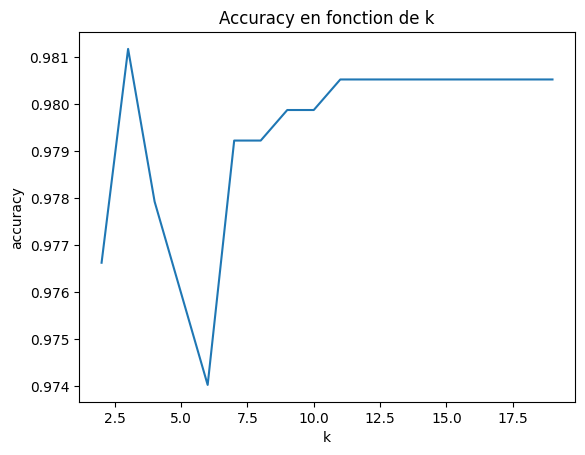

In [407]:
plt.title('Accuracy en fonction de k')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(valeurs_k, acc)
plt.show()

In [408]:
# Affichage du k optimal
best_k = valeurs_k[np.argmax(acc)]
k8 = acc[np.argmax(acc)]
print("k optimal: ", best_k)
print("Performance optimale: ", k8)

k optimal:  3
Performance optimale:  0.9811688311688312


In [409]:
knn8 = cl.ClassifierKNN(train_desc.shape[1], best_k)
knn8.train(train_desc, train_label[:,7])
a8 = knn8.accuracy(test_desc, test_label[:,7])

# Affichage du taux de bonne classification du dataset_train  
print("Taux de bonne classification sur le dataset_train: ", a8)

Taux de bonne classification sur le dataset_train:  0.9749019607843137


-------------------------------------------------------------------------------------------------------------------------------------------------

In [410]:
# TEST AVEC VALIDATION CROISEE EN 10 
# Groupe produits céréaliers

np.random.seed(42) 

valeurs_k = np.arange(2, 20)

niter = 10
acc = []
for k in valeurs_k:
    KNN9 = cl.ClassifierKNN(train_desc.shape[1],k)
    (perf, perf_moy, ecart) = ev.validation_croisee(KNN9,(train_desc,train_label[:,8]), niter)
    acc.append(perf_moy)

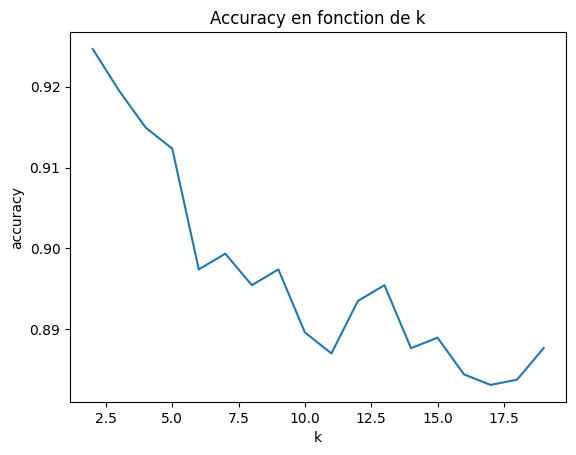

In [411]:
plt.title('Accuracy en fonction de k')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(valeurs_k, acc)
plt.show()

In [412]:
# Affichage du k optimal
best_k = valeurs_k[np.argmax(acc)]
k9 = acc[np.argmax(acc)]
print("k optimal: ", best_k)
print("Performance optimale: ", k9)

k optimal:  2
Performance optimale:  0.9246753246753248


In [413]:
knn9 = cl.ClassifierKNN(train_desc.shape[1], best_k)
knn9.train(train_desc, train_label[:,8])
a9 = knn9.accuracy(test_desc, test_label[:,8])

# Affichage du taux de bonne classification du dataset_train  
print("Taux de bonne classification sur le dataset_train: ", a9)

Taux de bonne classification sur le dataset_train:  0.8870588235294118


-------------------------------------------------------------------------------------------------------------------------------------------------

In [414]:
# TEST AVEC VALIDATION CROISEE EN 10 
# Groupe produits sucrés

np.random.seed(42) 

valeurs_k = np.arange(2, 20)

niter = 10
acc = []
for k in valeurs_k:
    KNN10 = cl.ClassifierKNN(train_desc.shape[1],k)
    (perf, perf_moy, ecart) = ev.validation_croisee(KNN10,(train_desc,train_label[:,9]), niter)
    acc.append(perf_moy)

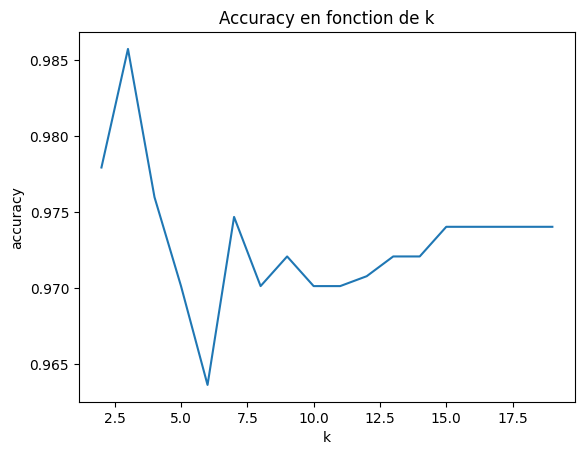

In [415]:
plt.title('Accuracy en fonction de k')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(valeurs_k, acc)
plt.show()

In [416]:
# Affichage du k optimal
best_k = valeurs_k[np.argmax(acc)]
k10 = acc[np.argmax(acc)]
print("k optimal: ", best_k)
print("Performance optimale: ", k10)

k optimal:  3
Performance optimale:  0.9857142857142858


In [417]:
knn10 = cl.ClassifierKNN(train_desc.shape[1], best_k)
knn10.train(train_desc, train_label[:,9])
a10 = knn10.accuracy(test_desc, test_label[:,9])

# Affichage du taux de bonne classification du dataset_train  
print("Taux de bonne classification sur le dataset_train: ", a10)

Taux de bonne classification sur le dataset_train:  0.9835294117647059


-------------------------------------------------------------------------------------------------------------------------------------------------

In [418]:
# TEST AVEC VALIDATION CROISEE EN 10 
# Groupe viandes, œufs, poissons

np.random.seed(42) 

valeurs_k = np.arange(2, 20)

niter = 10
acc = []
for k in valeurs_k:
    KNN11 = cl.ClassifierKNN(train_desc.shape[1],k)
    (perf, perf_moy, ecart) = ev.validation_croisee(KNN11,(train_desc,train_label[:,10]), niter)
    acc.append(perf_moy)

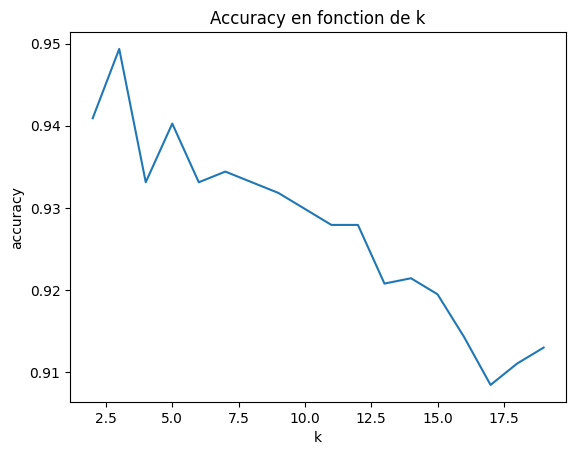

In [419]:
plt.title('Accuracy en fonction de k')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(valeurs_k, acc)
plt.show()

In [420]:
# Affichage du k optimal
best_k = valeurs_k[np.argmax(acc)]
k11 = acc[np.argmax(acc)]
print("k optimal: ", best_k)
print("Performance optimale: ", k11)

k optimal:  3
Performance optimale:  0.9493506493506494


In [421]:
knn11 = cl.ClassifierKNN(train_desc.shape[1], best_k)
knn11.train(train_desc, train_label[:,10])
a11 = knn11.accuracy(test_desc, test_label[:,10])

# Affichage du taux de bonne classification du dataset_train  
print("Taux de bonne classification sur le dataset_train: ", a11)

Taux de bonne classification sur le dataset_train:  0.9443137254901961


-------------------------------------------------------------------------------------------------------------------------------------------------

#### PERCEPTRON

Pour déterminer le learning rate optimal qui maximise les performances de notre classifieur, nous allons calculer la performance du classifieur sur différents learning rate et choisir celui qui a une meilleure performance. On utilisera la méthode de la validation croisée en 10 pour évaluer la performance.

-------------------------------------------------------------------------------------------------------------------------------------------------

In [422]:
# TEST AVEC VALIDATION CROISEE EN 10 
# Groupe aides culinaires et ingrédients divers

np.random.seed(42) 

epsilons = np.linspace(0.001, 0.1, num=5)
niter = 10
acc = []
for e in epsilons:
    PERCEPTRON1 = cl.ClassifierPerceptron(train_desc.shape[1], learning_rate=e)
    (perf, perf_moy, ecart) = ev.validation_croisee(PERCEPTRON1,(train_desc,train_label[:,0]), niter)
    acc.append(perf_moy)

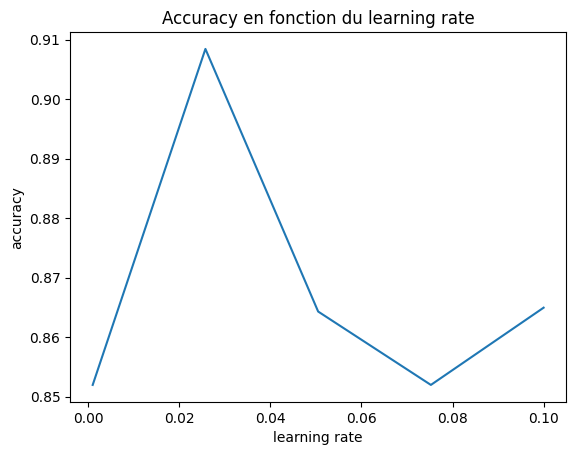

In [423]:
plt.title('Accuracy en fonction du learning rate')
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.plot(epsilons, acc)
plt.show()

In [424]:
best_eps = epsilons[np.argmax(acc)]
p1 = acc[np.argmax(acc)]
print("learning rate optimal: ", best_eps)
print("Performance optimale: ", p1)

learning rate optimal:  0.025750000000000002
Performance optimale:  0.9084415584415584


In [425]:
perceptron1 = cl.ClassifierPerceptron(train_desc.shape[1], learning_rate=best_eps)
perceptron1.train(train_desc, train_label[:,0])
b1 = perceptron1.accuracy(test_desc, test_label[:,0])

# Affichage du taux de bonne classification du dataset_train  
print("Taux de bonne classification sur le dataset_train: ", b1)

Taux de bonne classification sur le dataset_train:  0.9333333333333333


-------------------------------------------------------------------------------------------------------------------------------------------------

In [426]:
# TEST AVEC VALIDATION CROISEE EN 10 
# Groupe aliments infantiles

np.random.seed(42) 

epsilons = np.linspace(0.001, 0.1, num=5)
niter = 10
acc = []
for e in epsilons:
    PERCEPTRON2 = cl.ClassifierPerceptron(train_desc.shape[1], learning_rate=e)
    (perf, perf_moy, ecart) = ev.validation_croisee(PERCEPTRON2,(train_desc,train_label[:,1]), niter)
    acc.append(perf_moy)

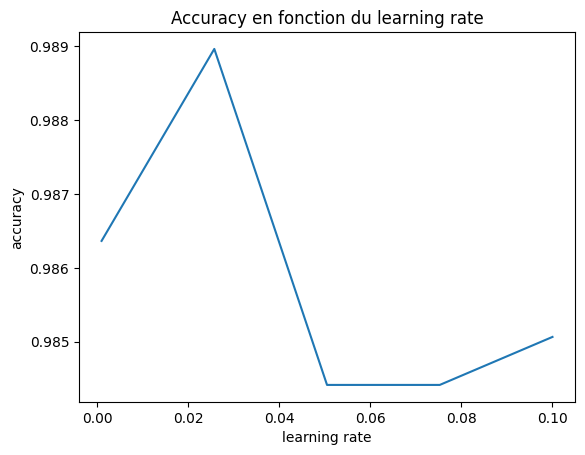

In [427]:
plt.title('Accuracy en fonction du learning rate')
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.plot(epsilons, acc)
plt.show()

In [428]:
best_eps = epsilons[np.argmax(acc)]
p2 = acc[np.argmax(acc)]
print("learning rate optimal: ", best_eps)
print("Performance optimale: ", p2)

learning rate optimal:  0.025750000000000002
Performance optimale:  0.9889610389610392


In [429]:
perceptron2 = cl.ClassifierPerceptron(train_desc.shape[1], learning_rate=best_eps)
perceptron2.train(train_desc, train_label[:,1])
b2 = perceptron2.accuracy(test_desc, test_label[:,1])

# Affichage du taux de bonne classification du dataset_train  
print("Taux de bonne classification sur le dataset_train: ", b2)

Taux de bonne classification sur le dataset_train:  0.9827450980392157


-------------------------------------------------------------------------------------------------------------------------------------------------

In [430]:
# TEST AVEC VALIDATION CROISEE EN 10 
# Groupe boissons

np.random.seed(42) 

epsilons = np.linspace(0.001, 0.1, num=5)
niter = 10
acc = []
for e in epsilons:
    PERCEPTRON3 = cl.ClassifierPerceptron(train_desc.shape[1], learning_rate=e)
    (perf, perf_moy, ecart) = ev.validation_croisee(PERCEPTRON3,(train_desc,train_label[:,2]), niter)
    acc.append(perf_moy)

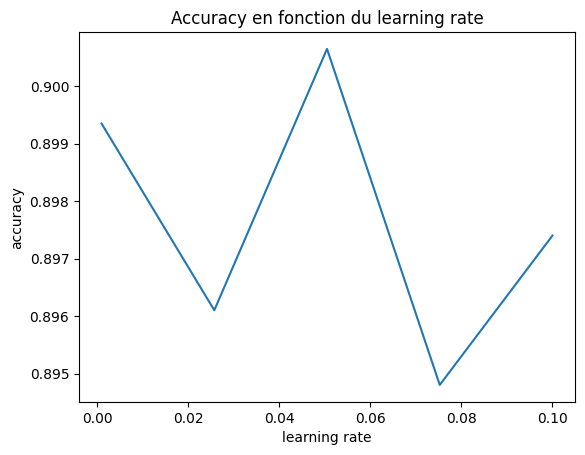

In [431]:
plt.title('Accuracy en fonction du learning rate')
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.plot(epsilons, acc)
plt.show()

In [432]:
best_eps = epsilons[np.argmax(acc)]
p3 = acc[np.argmax(acc)]
print("learning rate optimal: ", best_eps)
print("Performance optimale: ", p3)

learning rate optimal:  0.0505
Performance optimale:  0.9006493506493507


In [433]:
perceptron3 = cl.ClassifierPerceptron(train_desc.shape[1], learning_rate=best_eps)
perceptron3.train(train_desc, train_label[:,2])
b3 = perceptron3.accuracy(test_desc, test_label[:,2])

# Affichage du taux de bonne classification du dataset_train  
print("Taux de bonne classification sur le dataset_train: ", b3)

Taux de bonne classification sur le dataset_train:  0.9043137254901961


-------------------------------------------------------------------------------------------------------------------------------------------------

In [434]:
# TEST AVEC VALIDATION CROISEE EN 10 
# Groupe entrées et plats composés

np.random.seed(42) 

epsilons = np.linspace(0.001, 0.1, num=5)
niter = 10
acc = []
for e in epsilons:
    PERCEPTRON4 = cl.ClassifierPerceptron(train_desc.shape[1], learning_rate=e)
    (perf, perf_moy, ecart) = ev.validation_croisee(PERCEPTRON4,(train_desc,train_label[:,3]), niter)
    acc.append(perf_moy)

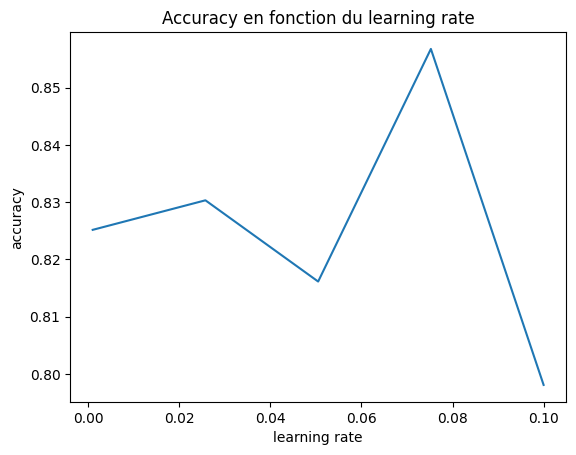

In [435]:
plt.title('Accuracy en fonction du learning rate')
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.plot(epsilons, acc)
plt.show()

In [436]:
best_eps = epsilons[np.argmax(acc)]
p4 = acc[np.argmax(acc)]
print("learning rate optimal: ", best_eps)
print("Performance optimale: ", p4)

learning rate optimal:  0.07525000000000001
Performance optimale:  0.8567741935483871


In [437]:
perceptron4 = cl.ClassifierPerceptron(train_desc.shape[1], learning_rate=best_eps)
perceptron4.train(train_desc, train_label[:,3])
b4 = perceptron4.accuracy(test_desc, test_label[:,3])

# Affichage du taux de bonne classification du dataset_train  
print("Taux de bonne classification sur le dataset_train: ", b4)

Taux de bonne classification sur le dataset_train:  0.8250980392156863


-------------------------------------------------------------------------------------------------------------------------------------------------

In [438]:
# TEST AVEC VALIDATION CROISEE EN 10 
# Groupe fruits, légumes, légumineuses et oléagineux

np.random.seed(42) 

epsilons = np.linspace(0.001, 0.1, num=5)
niter = 10
acc = []
for e in epsilons:
    PERCEPTRON5 = cl.ClassifierPerceptron(train_desc.shape[1], learning_rate=e)
    (perf, perf_moy, ecart) = ev.validation_croisee(PERCEPTRON5,(train_desc,train_label[:,4]), niter)
    acc.append(perf_moy)

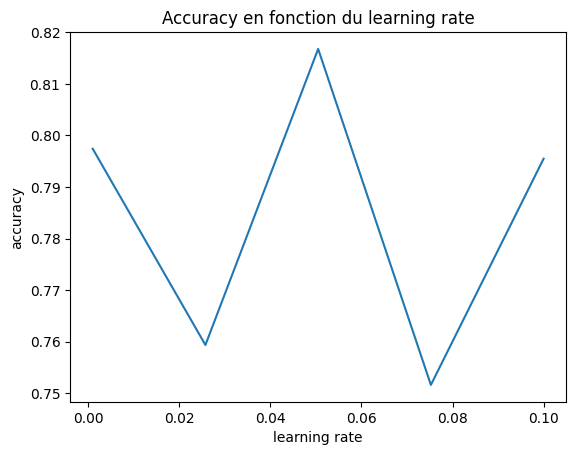

In [439]:
plt.title('Accuracy en fonction du learning rate')
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.plot(epsilons, acc)
plt.show()

In [440]:
best_eps = epsilons[np.argmax(acc)]
p5 = acc[np.argmax(acc)]
print("learning rate optimal: ", best_eps)
print("Performance optimale: ", p5)

learning rate optimal:  0.0505
Performance optimale:  0.8167741935483871


In [441]:
perceptron5 = cl.ClassifierPerceptron(train_desc.shape[1], learning_rate=best_eps)
perceptron5.train(train_desc, train_label[:,4])
b5 = perceptron5.accuracy(test_desc, test_label[:,4])

# Affichage du taux de bonne classification du dataset_train  
print("Taux de bonne classification sur le dataset_train: ", b5)

Taux de bonne classification sur le dataset_train:  0.832156862745098


-------------------------------------------------------------------------------------------------------------------------------------------------

In [442]:
# TEST AVEC VALIDATION CROISEE EN 10 
# Groupe glaces et sorbets

np.random.seed(42) 

epsilons = np.linspace(0.001, 0.1, num=5)
niter = 10
acc = []
for e in epsilons:
    PERCEPTRON6 = cl.ClassifierPerceptron(train_desc.shape[1], learning_rate=e)
    (perf, perf_moy, ecart) = ev.validation_croisee(PERCEPTRON6,(train_desc,train_label[:,5]), niter)
    acc.append(perf_moy)

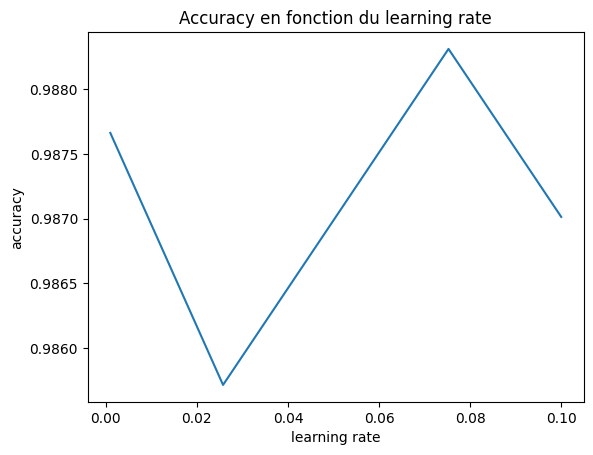

In [443]:
plt.title('Accuracy en fonction du learning rate')
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.plot(epsilons, acc)
plt.show()

In [444]:
best_eps = epsilons[np.argmax(acc)]
p6 = acc[np.argmax(acc)]
print("learning rate optimal: ", best_eps)
print("Performance optimale: ", p6)

learning rate optimal:  0.07525000000000001
Performance optimale:  0.9883116883116884


In [445]:
perceptron6 = cl.ClassifierPerceptron(train_desc.shape[1], learning_rate=best_eps)
perceptron6.train(train_desc, train_label[:,5])
b6 = perceptron6.accuracy(test_desc, test_label[:,5])

# Affichage du taux de bonne classification du dataset_train  
print("Taux de bonne classification sur le dataset_train: ", b6)

Taux de bonne classification sur le dataset_train:  0.9882352941176471


-------------------------------------------------------------------------------------------------------------------------------------------------

In [446]:
# TEST AVEC VALIDATION CROISEE EN 10 
# Groupe lait et produits laitiers

np.random.seed(42) 

epsilons = np.linspace(0.001, 0.1, num=5)
niter = 10
acc = []
for e in epsilons:
    PERCEPTRON7 = cl.ClassifierPerceptron(train_desc.shape[1], learning_rate=e)
    (perf, perf_moy, ecart) = ev.validation_croisee(PERCEPTRON7,(train_desc,train_label[:,6]), niter)
    acc.append(perf_moy)

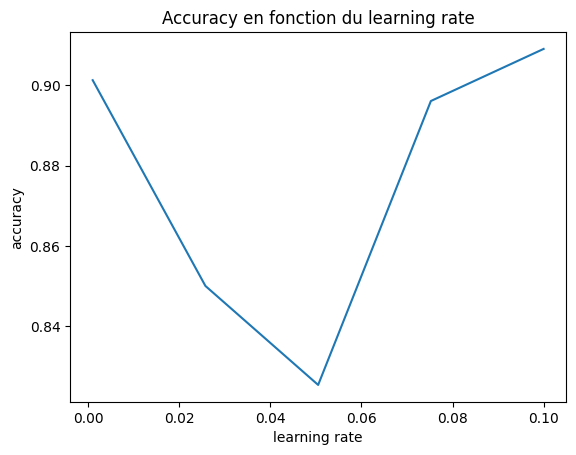

In [447]:
plt.title('Accuracy en fonction du learning rate')
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.plot(epsilons, acc)
plt.show()

In [448]:
best_eps = epsilons[np.argmax(acc)]
p7 = acc[np.argmax(acc)]
print("learning rate optimal: ", best_eps)
print("Performance optimale: ", p7)

learning rate optimal:  0.1
Performance optimale:  0.909090909090909


In [449]:
perceptron7 = cl.ClassifierPerceptron(train_desc.shape[1], learning_rate=best_eps)
perceptron7.train(train_desc, train_label[:,6])
b7 = perceptron7.accuracy(test_desc, test_label[:,6])

# Affichage du taux de bonne classification du dataset_train  
print("Taux de bonne classification sur le dataset_train: ", b7)

Taux de bonne classification sur le dataset_train:  0.24862745098039216


-------------------------------------------------------------------------------------------------------------------------------------------------

In [450]:
# TEST AVEC VALIDATION CROISEE EN 10 
# Groupe matières grasses

np.random.seed(42) 

epsilons = np.linspace(0.001, 0.1, num=5)
niter = 10
acc = []
for e in epsilons:
    PERCEPTRON8 = cl.ClassifierPerceptron(train_desc.shape[1], learning_rate=e)
    (perf, perf_moy, ecart) = ev.validation_croisee(PERCEPTRON8,(train_desc,train_label[:,7]), niter)
    acc.append(perf_moy)

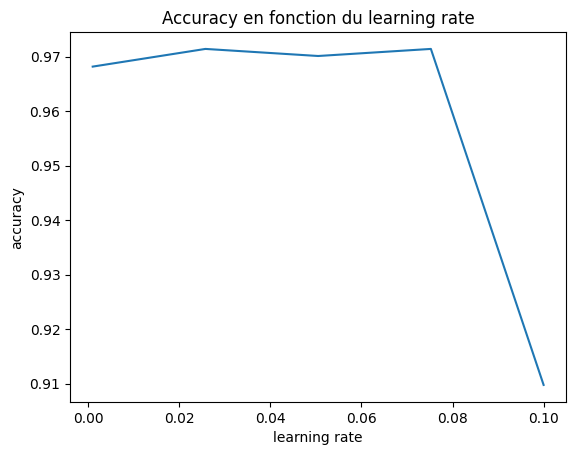

In [451]:
plt.title('Accuracy en fonction du learning rate')
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.plot(epsilons, acc)
plt.show()

In [452]:
best_eps = epsilons[np.argmax(acc)]
p8 = acc[np.argmax(acc)]
print("learning rate optimal: ", best_eps)
print("Performance optimale: ", p8)

learning rate optimal:  0.025750000000000002
Performance optimale:  0.9714285714285713


In [453]:
perceptron8 = cl.ClassifierPerceptron(train_desc.shape[1], learning_rate=best_eps)
perceptron8.train(train_desc, train_label[:,7])
b8 = perceptron8.accuracy(test_desc, test_label[:,7])

# Affichage du taux de bonne classification du dataset_train  
print("Taux de bonne classification sur le dataset_train: ", b8)

Taux de bonne classification sur le dataset_train:  0.9749019607843137


-------------------------------------------------------------------------------------------------------------------------------------------------

In [454]:
# TEST AVEC VALIDATION CROISEE EN 10 
# Groupe produits céréaliers

np.random.seed(42) 

epsilons = np.linspace(0.001, 0.1, num=5)
niter = 10
acc = []
for e in epsilons:
    PERCEPTRON9 = cl.ClassifierPerceptron(train_desc.shape[1], learning_rate=e)
    (perf, perf_moy, ecart) = ev.validation_croisee(PERCEPTRON9,(train_desc,train_label[:,8]), niter)
    acc.append(perf_moy)

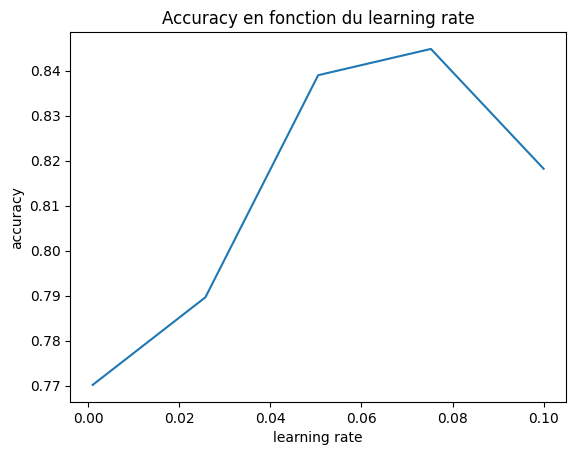

In [455]:
plt.title('Accuracy en fonction du learning rate')
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.plot(epsilons, acc)
plt.show()

In [456]:
best_eps = epsilons[np.argmax(acc)]
p9 = acc[np.argmax(acc)]
print("learning rate optimal: ", best_eps)
print("Performance optimale: ", p9)

learning rate optimal:  0.07525000000000001
Performance optimale:  0.8448051948051948


In [457]:
perceptron9 = cl.ClassifierPerceptron(train_desc.shape[1], learning_rate=best_eps)
perceptron9.train(train_desc, train_label[:,8])
b9 = perceptron9.accuracy(test_desc, test_label[:,8])

# Affichage du taux de bonne classification du dataset_train  
print("Taux de bonne classification sur le dataset_train: ", b9)

Taux de bonne classification sur le dataset_train:  0.8376470588235294


-------------------------------------------------------------------------------------------------------------------------------------------------

In [458]:
# TEST AVEC VALIDATION CROISEE EN 10 
# Groupe produits sucrés

np.random.seed(42) 

epsilons = np.linspace(0.001, 0.1, num=5)
niter = 10
acc = []
for e in epsilons:
    PERCEPTRON10 = cl.ClassifierPerceptron(train_desc.shape[1], learning_rate=e)
    (perf, perf_moy, ecart) = ev.validation_croisee(PERCEPTRON10,(train_desc,train_label[:,9]), niter)
    acc.append(perf_moy)

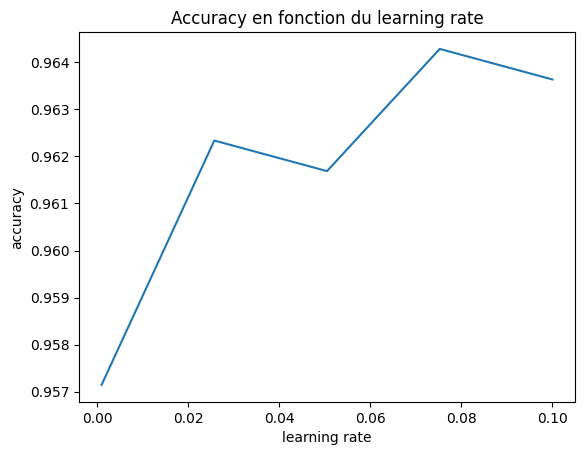

In [459]:
plt.title('Accuracy en fonction du learning rate')
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.plot(epsilons, acc)
plt.show()

In [460]:
best_eps = epsilons[np.argmax(acc)]
p10 = acc[np.argmax(acc)]
print("learning rate optimal: ", best_eps)
print("Performance optimale: ", p10)

learning rate optimal:  0.07525000000000001
Performance optimale:  0.9642857142857142


In [461]:
perceptron10 = cl.ClassifierPerceptron(train_desc.shape[1], learning_rate=best_eps)
perceptron10.train(train_desc, train_label[:,9])
b10 = perceptron10.accuracy(test_desc, test_label[:,9])

# Affichage du taux de bonne classification du dataset_train  
print("Taux de bonne classification sur le dataset_train: ", b10)

Taux de bonne classification sur le dataset_train:  0.9811764705882353


-------------------------------------------------------------------------------------------------------------------------------------------------

In [462]:
# TEST AVEC VALIDATION CROISEE EN 10 
# Groupe viandes, œufs, poissons

np.random.seed(42) 

epsilons = np.linspace(0.001, 0.1, num=5)
niter = 10
acc = []
for e in epsilons:
    PERCEPTRON11 = cl.ClassifierPerceptron(train_desc.shape[1], learning_rate=e)
    (perf, perf_moy, ecart) = ev.validation_croisee(PERCEPTRON11,(train_desc,train_label[:,10]), niter)
    acc.append(perf_moy)

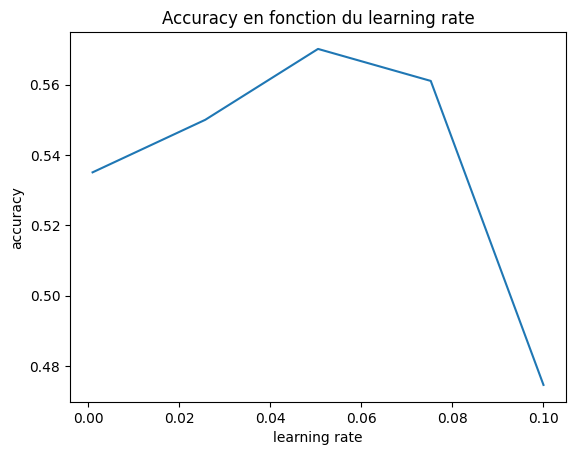

In [463]:
plt.title('Accuracy en fonction du learning rate')
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.plot(epsilons, acc)
plt.show()

In [464]:
best_eps = epsilons[np.argmax(acc)]
p11 = acc[np.argmax(acc)]
print("learning rate optimal: ", best_eps)
print("Performance optimale: ", p11)

learning rate optimal:  0.0505
Performance optimale:  0.5701298701298702


In [465]:
perceptron11 = cl.ClassifierPerceptron(train_desc.shape[1], learning_rate=best_eps)
perceptron11.train(train_desc, train_label[:,10])
b11 = perceptron11.accuracy(test_desc, test_label[:,10])

# Affichage du taux de bonne classification du dataset_train  
print("Taux de bonne classification sur le dataset_train: ", b11)

Taux de bonne classification sur le dataset_train:  0.7592156862745097


-------------------------------------------------------------------------------------------------------------------------------------------------

#### ARBRE DE DECISION

In [466]:
data1_noms = np.array(data1_noms)
data1_noms

array(['Score unique EF 3.1', 'Changement climatique',
       "Appauvrissement de la couche d'ozone", 'Rayonnements ionisants',
       "Formation photochimique d'ozone", 'Particules fines',
       'Effets toxicologiques sur la santé humaine\xa0: substances non-cancérogènes',
       'Effets toxicologiques sur la santé humaine\xa0: substances cancérogènes',
       'Acidification terrestre et eaux douces',
       'Eutrophisation eaux douces', 'Eutrophisation marine',
       'Eutrophisation terrestre',
       "Écotoxicité pour écosystèmes aquatiques d'eau douce",
       'Utilisation du sol', 'Épuisement des ressources eau',
       'Épuisement des ressources énergétiques',
       'Épuisement des ressources minéraux'], dtype=object)

In [467]:
data1

,Groupe d'aliment,Score unique EF 3.1,Changement climatique,Appauvrissement de la couche d'ozone,Rayonnements ionisants,Formation photochimique d'ozone,Particules fines,Effets toxicologiques sur la santé humaine : substances non-cancérogènes,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
0,aides culinaires et ingrédients divers,1.2300,6.770,1.020000e-06,11.100,0.03890,7.170000e-07,7.440000e-08,6.480000e-09,0.09970,0.001870,0.01330,0.12700,44.60,26.5,3.100,315.00,0.000088
1,aides culinaires et ingrédients divers,0.1030,0.749,1.230000e-07,0.171,0.00293,8.250000e-08,1.170000e-08,4.660000e-10,0.00622,0.000124,0.00232,0.01270,5.83,20.2,2.520,12.70,0.000007
2,aides culinaires et ingrédients divers,0.0638,0.356,5.450000e-08,0.143,0.00107,2.330000e-08,7.450000e-09,2.980000e-10,0.00200,0.000068,0.00212,0.00628,4.09,18.5,3.020,6.23,0.000004
3,aides culinaires et ingrédients divers,0.1320,0.815,6.270000e-08,0.141,0.00256,6.900000e-08,1.200000e-08,6.190000e-10,0.00811,0.000203,0.00405,0.03120,5.68,36.4,5.290,12.60,0.000005
4,aides culinaires et ingrédients divers,1.2300,6.770,1.020000e-06,11.100,0.03890,7.170000e-07,7.440000e-08,6.480000e-09,0.09970,0.001870,0.01330,0.12700,44.60,26.5,3.100,315.00,0.000088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,"viandes, œufs, poissons",2.1800,22.400,7.120000e-07,1.870,0.04180,1.520000e-06,4.350000e-07,1.080000e-08,0.22500,0.002210,0.15600,0.96000,193.00,1520.0,6.280,111.00,0.000038
2513,"viandes, œufs, poissons",2.2600,23.600,7.740000e-07,1.680,0.04380,1.570000e-06,4.500000e-07,1.120000e-08,0.23200,0.002300,0.16000,0.99000,200.00,1570.0,6.520,116.00,0.000041
2514,"viandes, œufs, poissons",0.8160,4.250,7.760000e-07,0.425,0.06480,7.260000e-07,9.080000e-08,4.020000e-09,0.09540,0.000677,0.02250,0.24400,24.10,14.7,0.559,60.60,0.000163
2515,"viandes, œufs, poissons",1.0300,5.160,9.570000e-07,1.120,0.07900,8.870000e-07,1.140000e-07,5.000000e-09,0.11700,0.000867,0.02750,0.29900,29.30,18.7,0.643,86.30,0.000203


In [468]:
df_desc = np.array(data1[data1_noms])
df_label = np.array(data1['Groupe d\'aliment'])

In [469]:
df_desc[0:6,:]

array([[1.23e+00, 6.77e+00, 1.02e-06, 1.11e+01, 3.89e-02, 7.17e-07,
        7.44e-08, 6.48e-09, 9.97e-02, 1.87e-03, 1.33e-02, 1.27e-01,
        4.46e+01, 2.65e+01, 3.10e+00, 3.15e+02, 8.76e-05],
       [1.03e-01, 7.49e-01, 1.23e-07, 1.71e-01, 2.93e-03, 8.25e-08,
        1.17e-08, 4.66e-10, 6.22e-03, 1.24e-04, 2.32e-03, 1.27e-02,
        5.83e+00, 2.02e+01, 2.52e+00, 1.27e+01, 6.60e-06],
       [6.38e-02, 3.56e-01, 5.45e-08, 1.43e-01, 1.07e-03, 2.33e-08,
        7.45e-09, 2.98e-10, 2.00e-03, 6.79e-05, 2.12e-03, 6.28e-03,
        4.09e+00, 1.85e+01, 3.02e+00, 6.23e+00, 3.72e-06],
       [1.32e-01, 8.15e-01, 6.27e-08, 1.41e-01, 2.56e-03, 6.90e-08,
        1.20e-08, 6.19e-10, 8.11e-03, 2.03e-04, 4.05e-03, 3.12e-02,
        5.68e+00, 3.64e+01, 5.29e+00, 1.26e+01, 4.78e-06],
       [1.23e+00, 6.77e+00, 1.02e-06, 1.11e+01, 3.89e-02, 7.17e-07,
        7.44e-08, 6.48e-09, 9.97e-02, 1.87e-03, 1.33e-02, 1.27e-01,
        4.46e+01, 2.65e+01, 3.10e+00, 3.15e+02, 8.76e-05],
       [1.21e+00, 6.58e+0

In [470]:
df_label[0:6]

array(['aides culinaires et ingrédients divers',
       'aides culinaires et ingrédients divers',
       'aides culinaires et ingrédients divers',
       'aides culinaires et ingrédients divers',
       'aides culinaires et ingrédients divers',
       'aides culinaires et ingrédients divers'], dtype=object)

In [471]:
import graphviz as gv

-------------------------------------------------------------------------------------------------------------------------------------------------

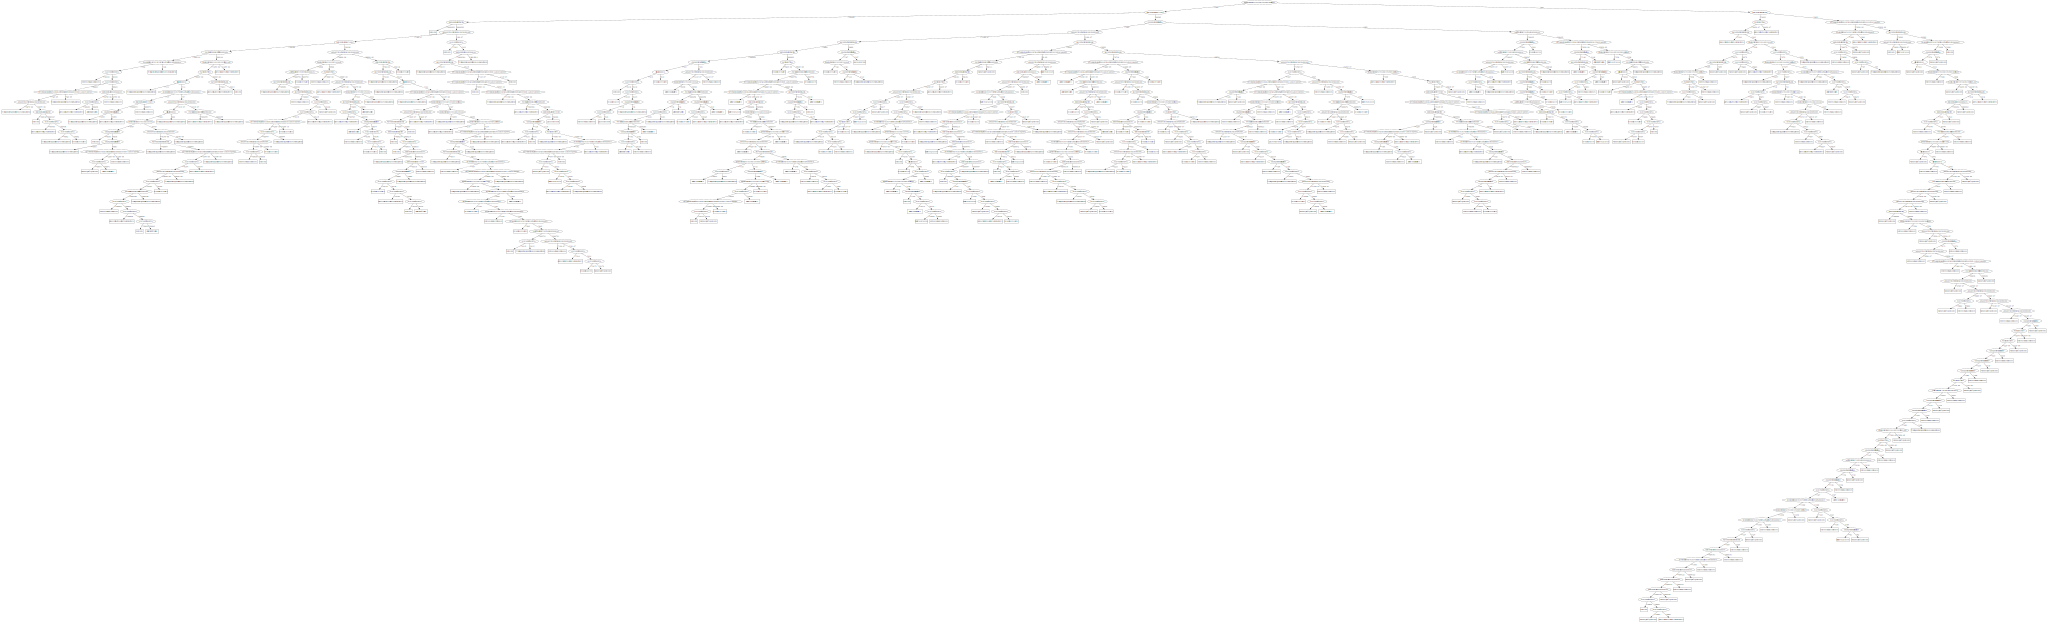

In [472]:
# Initialiation d'un arbre pour le dataset Iris:
arbre = cl.ClassifierArbreNumerique(len(data1_noms), 0.0, data1_noms)

# Construction de l'arbre de décision à partir du dataset Iris
arbre.train(df_desc,df_label)

# Construction de la représentation graphique (affichage)
graphe_arbre = gv.Digraph(format='png')
arbre.affiche(graphe_arbre)

# Affichage du graphe obtenu:
graphe_arbre

In [473]:
(perf, perf_moy, ecart) = ev.validation_croisee(arbre, (df_desc,df_label), 10)
       
print("\nValidation croisée sur les iris avec comme seuil ",0.0)
print("Perf obtenues : ",perf)
print(f'\nAccuracy moyenne: {perf_moy:.3f}\técart type: {ecart:.3f}')


Validation croisée sur les iris avec comme seuil  0.0
Perf obtenues :  [0.6842105263157895, 0.5789473684210527, 0.7894736842105263, 0.8421052631578947, 0.9473684210526315, 0.42105263157894735, 0.8947368421052632, 0.631578947368421, 0.6842105263157895, 0.7894736842105263]

Accuracy moyenne: 0.726	écart type: 0.150


Nous constatons que l'execution de la méthode validation croisée en 10 sur l'arbre de décision numérique est long (supérieur à 10 min). Il est donc difficile d'évaluer le classifieur pour differentes valeurs d'epsilon. 

-------------------------------------------------------------------------------------------------------------------------------------------------

In [495]:
perf_KNN = pd.DataFrame(columns=valeurs)

perf_knn = pd.Series([k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11],index=valeurs) 
perf_test = pd.Series([a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11],index=valeurs)
perf_KNN.loc[len(perf_KNN)] = perf_knn
perf_KNN.loc[len(perf_KNN)] = perf_test

perf_KNN

,aides culinaires et ingrédients divers,aliments infantiles,boissons,entrées et plats composés,"fruits, légumes, légumineuses et oléagineux",glaces et sorbets,lait et produits laitiers,matières grasses,produits céréaliers,produits sucrés,"viandes, œufs, poissons"
0,0.943506,0.993506,0.967532,0.923226,0.921290,0.996104,0.950000,0.981169,0.924675,0.985714,0.949351
1,0.941961,0.986667,0.956863,0.902745,0.887843,0.996078,0.926275,0.974902,0.887059,0.983529,0.944314


In [496]:
perf_PERCEPTRON = pd.DataFrame(columns=valeurs)

perf_perceptron = pd.Series([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11],index=valeurs) 
perf_test = pd.Series([b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11],index=valeurs)
perf_PERCEPTRON.loc[len(perf_PERCEPTRON)] = perf_perceptron
perf_PERCEPTRON.loc[len(perf_PERCEPTRON)] = perf_test

perf_PERCEPTRON
    

,aides culinaires et ingrédients divers,aliments infantiles,boissons,entrées et plats composés,"fruits, légumes, légumineuses et oléagineux",glaces et sorbets,lait et produits laitiers,matières grasses,produits céréaliers,produits sucrés,"viandes, œufs, poissons"
0,0.908442,0.988961,0.900649,0.856774,0.816774,0.988312,0.909091,0.971429,0.844805,0.964286,0.570130
1,0.933333,0.982745,0.904314,0.825098,0.832157,0.988235,0.248627,0.974902,0.837647,0.981176,0.759216


-------------------------------------------------------------------------------------------------------------------------------------------------

### APPRENTISSAGE NON SUPERVISE

#### Pré-traitement des données

In [497]:
data_synthese.columns

Index(['Code AGB', 'Code CIQUAL', 'Groupe d'aliment', 'Sous-groupe d'aliment',
       'Nom du Produit en Français', 'LCI Name', 'code saison', 'code avion',
       'Livraison', 'Matériau d'emballage', 'Préparation', 'DQR',
       'Score unique EF 3.1', 'Changement climatique',
       'Appauvrissement de la couche d'ozone', 'Rayonnements ionisants',
       'Formation photochimique d'ozone', 'Particules fines',
       'Effets toxicologiques sur la santé humaine : substances non-cancérogènes',
       'Effets toxicologiques sur la santé humaine : substances cancérogènes',
       'Acidification terrestre et eaux douces', 'Eutrophisation eaux douces',
       'Eutrophisation marine', 'Eutrophisation terrestre',
       'Écotoxicité pour écosystèmes aquatiques d'eau douce',
       'Utilisation du sol', 'Épuisement des ressources eau',
       'Épuisement des ressources énergétiques',
       'Épuisement des ressources minéraux'],
      dtype='object')

In [501]:
data2 = pd.DataFrame(data_synthese['Score unique EF 3.1'])
data2

,Score unique EF 3.1
0,1.2300
1,0.1030
2,0.0638
3,0.1320
4,1.2300
...,...
2512,2.1800
2513,2.2600
2514,0.8160
2515,1.0300
